In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('silver.csv')
data.head()

,Date,USD,GBP,EURO
0,2022-04-21,24.645,18.87,22.61
1,2022-04-20,25.200,19.30,23.21
2,2022-04-19,25.915,19.89,24.01
3,2022-04-14,25.655,19.54,23.53
4,2022-04-13,25.640,19.72,23.68


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
resampled_data = data['USD'].resample('Y').sum().to_frame()
resampled_data.head()

,USD
Date,
1968-12-31,549.481
1969-12-31,457.115
1970-12-31,450.266
1971-12-31,382.547
1972-12-31,422.578


In [6]:
resampled_data.index = resampled_data.index.year

In [7]:
resampled_data.reset_index(inplace=True)
resampled_data.rename(columns={'Date': 'Year'}, inplace=True)

In [8]:
resampled_data.head()

,Year,USD
0,1968,549.481
1,1969,457.115
2,1970,450.266
3,1971,382.547
4,1972,422.578


In [12]:
years = resampled_data['Year'].tolist()
usd = resampled_data['USD'].tolist()

In [13]:
X = [i - years[len(years) // 2] for i in years]
x2 = [i ** 2 for i in X]
xy = [i * j for i, j in zip(X, Euro)]

n = len(years)
b = (n * sum(xy) - sum(usd) * sum(X)) / (n * sum(x2) - (sum(X) ** 2))
a = (sum(usd) - b * sum(X)) / n
linear_trend = [a + b * X[i] for i in range(n)]

In [14]:
x3 = [i ** 3 for i in X]
x4 = [i ** 4 for i in X]
x2y = [i * j for i, j in zip(x2, usd)]

coeff = [[len(X), sum(X), sum(x2)],
         [sum(X), sum(x2), sum(x3)],
         [sum(x2), sum(x3), sum(x4)]]

Y = [sum(usd), sum(xy), sum(x2y)]
A = np.array(coeff)
B = np.array(Y)

solution = np.linalg.solve(A, B)
a_poly, b_poly, c_poly = solution
poly_trend = [a_poly + b_poly * X[i] + c_poly * (X[i] ** 2) for i in range(n)]

In [15]:
print(f"Linear Trend: y={a:.2f} + {b:.2f}x")
print(f"\nPolynomial Trend: y={a_poly:.2f} + {b_poly:.2f}x + {c_poly:.2f}x²")

Linear Trend: y=2460.81 + 79.10x

Polynomial Trend: y=2021.05 + 79.10x + 1.75x²


In [16]:
resampled_data['Linear Trend'] = linear_trend
resampled_data['Polynomial Trend'] = poly_trend

In [17]:
resampled_data.set_index('Year',inplace=True)

<Axes: xlabel='Year'>

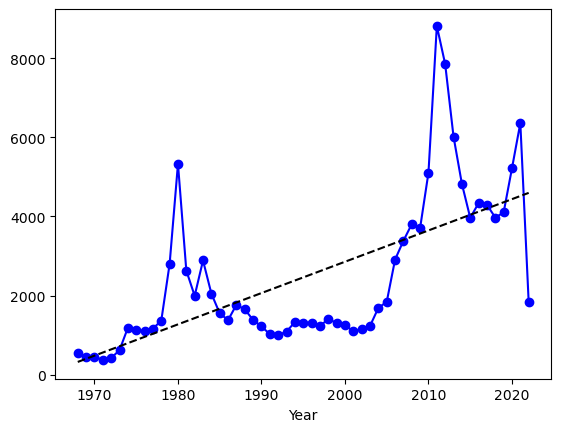

In [18]:
resampled_data['USD'].plot(kind='line',color='blue',marker='o') 
resampled_data['Linear Trend'].plot(kind='line',color='black',linestyle='--')

<Axes: xlabel='Year'>

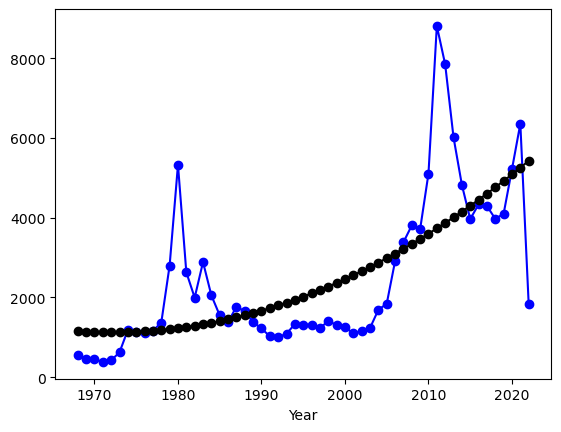

In [19]:
resampled_data['USD'].plot(kind='line',color='blue',marker='o')
resampled_data['Polynomial Trend'].plot(kind='line',color='black',marker='o')